In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from torchvision import datasets
data_path = '/content/drive/MyDrive/datasets/DeepLearningPyTorch/p1ch7'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # Descarga de los datos de entrenamiento
                                                                 # download=True: Descarga el dataset si aún no está en la carpeta data_path
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # Descarga de los datos de validación

Files already downloaded and verified
Files already downloaded and verified


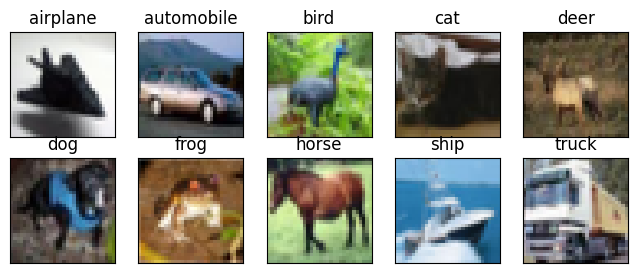

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [5]:
"""
type(cifar10).__mro__
Esta línea obtiene la jerarquía de herencia de la clase del objeto cifar10.

__mro__ significa Method Resolution Order (Orden de Resolución de Métodos).
Muestra el orden en el que Python busca los métodos y atributos en una clase y sus clases base.

En el output se puede ver la jerarquía de clases de cifar10:
    torchvision.datasets.cifar.CIFAR10 → La clase específica del dataset CIFAR-10, cifar10 es una instancia de esta clase
    torchvision.datasets.vision.VisionDataset → Una clase base para datasets de visión en torchvision.
    torch.utils.data.dataset.Dataset → Clase base de PyTorch para manejar datasets.
    object → La clase base de todas las clases en Python.
Esta información es útil si para entender cómo se estructura la clase y en qué orden se heredan métodos y atributos.

cifar10  (instancia de CIFAR10)
    └── torchvision.datasets.cifar.CIFAR10
        └── torchvision.datasets.vision.VisionDataset
            └── torch.utils.data.dataset.Dataset
                └── typing.Generic  (en versiones recientes)
                    └── object  (clase base de todas las clases en Python)
"""

type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

# Objetos `Dataset`
Un objeto de la clase `Dataset` implementa dos métodos:

- `__len__` retorna el número de items en el dataset
- `__getitem__` retorna el item, una muestra y su correspondiente etiqueta

No necesariamente esto dicho objeto contiene los datos pero proporciona acceso uniforme a ellos a través de los métodos con estos métodos.

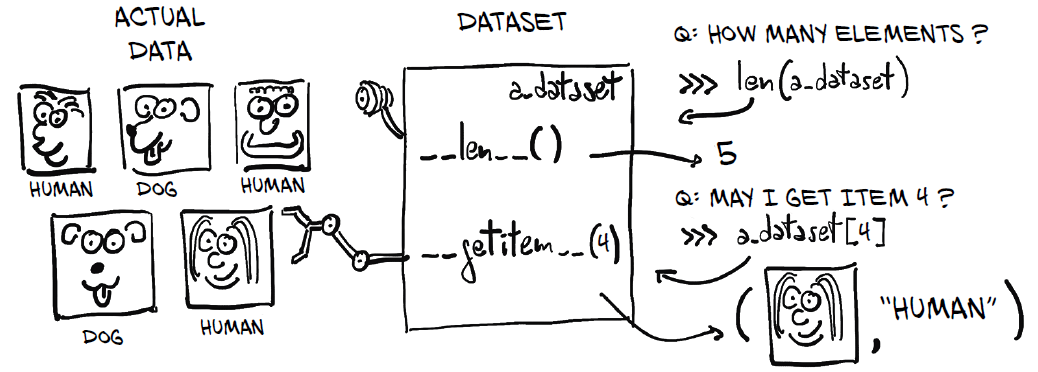

In [6]:
# Lista de métodos disponibles para cifar10
dir(cifar10)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_integrity',
 '_format_transform_repr',
 '_is_protocol',
 '_load_meta',
 '_repr_indent',
 'base_folder',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'filename',
 'meta',
 'root',
 'target_transform',
 'targets',
 'test_list',
 'tgz_md5',
 'train',
 'train_list',
 'transform',
 'transforms',
 'url']

In [7]:
# Verifica si un método esta disponible para el objeto especificado
hasattr(cifar10, 'meta')

True

In [8]:
len(cifar10)

50000

In [9]:
img, label = cifar10[99]  # Cada muestra es un par imagen-etiqueta
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

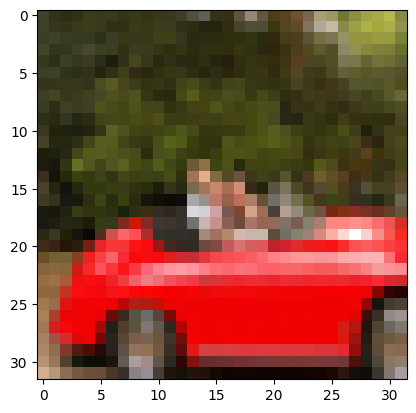

In [10]:
plt.imshow(img)
plt.show()

In [11]:
from torchvision import transforms
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

**Módulo `transforms`**

Es necesario convertir las imagenes PIL en tensores de PyTorch, ahí es donde entra en juego el módulo `torchvision.transforms`, este define un conjunto de objetos componibles, similares a funciones, que se pueden pasar como arguementos a datasets de `torchvision` tales como `datasets.CIFAR10()` y que realizar transformacciones en los datos despues de que se cargan pero antes de que `__getitem__` los retorne.

In [12]:
from torchvision import transforms

to_tensor = transforms.ToTensor()  # ToTensor convierte matrices NumPy en imagenes  PIL en tensores. También se encarga de
img_t = to_tensor(img)             # establecer las dimensiones del tensor de salida como CxHxW (canal, alto y ancho)
img_t.shape

torch.Size([3, 32, 32])

In [13]:
# Para transformar el dataset se le pasa como argumento al propio dataset un objeto del módulo torchvision.transforms
# en este caso se le pasa transforms.ToTensor() para asi convertir las imagenes PIL en tensores de PyTorch

tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.ToTensor())

In [14]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [15]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [16]:
img_t.min(), img_t.max()  # Los valores en la imagen PIL original variaban de 0 a 255 (8 bits por canal), la
                          # transformación ToTensor convierte los datos a punto flotante de 32 bits por canal
                          # reduciendo los valores en el rango 0.0 a 1.0

(tensor(0.), tensor(1.))

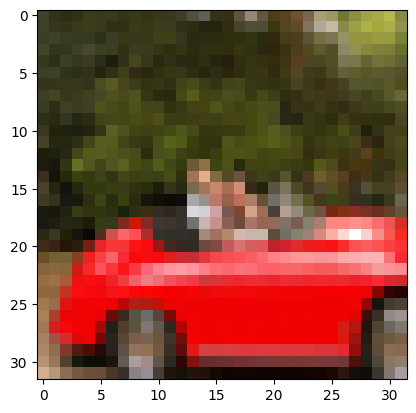

In [17]:
plt.imshow(img_t.permute(1, 2, 0))  # Para convertir el tensor de nuevo en una imagen en el formato que plt espera hay
plt.show()                          # que permutar el orden de los ejes (número de canales en la última dimensión)

In [18]:
# Se 'apilan' solo los tensores con imágenes en tensor_cifar10 con el objetivo de normalizarlas
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [19]:
imgs.view(3, -1).mean(dim=1)  # view(shape) retorna un tensor con una nueva forma dada por el argumento shape,
                              # con lo cual, view(3, -1) conserva los 3 canales RGB en la primera dimensión y el
                              # resto (esto quiere decir el -1) pasa a la segunda dimensión (los 32x32x50000) con
                              # lo que resulta en un tensor de 3 filas 32x32x50000 columnas y a este tensor se
                              # aplica .mean obteniendose un tensor con la media de cada canal

tensor([0.4914, 0.4822, 0.4465])

In [20]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [21]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [22]:
"""
Finalmente, al tener los calculos de la media y desviación estandar de cada canal en el
conjunto de imágenes en el dataset se lo puede transformar usando transforms.Compose()
para concatenar ToTensor y Normalize para obtner un dataset con el formato correcto para
entrenar un modelo con PyTorch
"""

transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [23]:
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

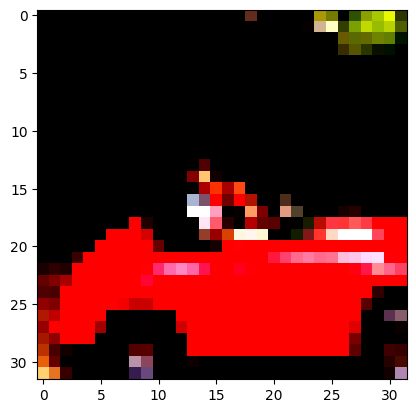

In [24]:
"""
Ahora una imagen de una muestra del conjunto de datos no proporcionará
una represnetación fiel de la imagen real ya que la normalización a
desplazado los niveles RGB del rango 0.0 a 1.0 y ha cambiado las magnitudes
generales de los 3 canales. Los datos siguen allí pero en otra escala que
matplotlib representa como negro.
"""

img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()